# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [3]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`


for best implementation of linear regression , we have to minimize cost function ans. And for that we have to choose correct weight coefficient..equation be like y=w0+w1x1+w2x2+....
where wo is a constant bias.
To minimize cost function we can use gradient decent with a suitable learning rate and epoch.they are basically hyperparameter.
actually we have to try all learning rates. 
for one particular learning rate , we iterate a loop for epoch times and calculate partial differentiation for each variable and set weights coefficient .
and we have to running loop until we get a optimal choice .
and final value of weight coefficient use in linear regression


In [5]:
# 1.3.1.2
# implement Linear Regression

# 1.3.1.2
# implement Linear Regression
def gradient_descent(x,y,learning_rate,epochs):
    cost=[]
    epoch=[]
    lst=[]
    for i in range(len(x)):
      lst.append(1)
    conterm = pd.DataFrame(lst)

    x_bias=np.concatenate((conterm,x), axis=1)
    theta=(np.zeros(x_bias.shape[1]))
    
    for e in range(epochs):
        y_pred=np.dot(x_bias,theta)
        diff=y-y_pred
        c=np.sum(np.dot(diff.T,diff))
        
        gradient=-1*(np.matmul(x_bias.T,(y-y_pred))/len(x_bias))
        theta=theta-learning_rate*gradient
       
        epoch.append(e+1)
        cost.append(c)
    return theta,epoch,cost  
def linearRegression(x_train,y_train,x_test,learningRate=1e-1,epochs=10000):
    theta,ep,cost=gradient_descent(x_train,y_train,learningRate,epochs)
    lst=[]
    for i in range(len(x_test)):
      lst.append(1)
    conterm = pd.DataFrame(lst)

    x_bias=np.concatenate((conterm,x_test), axis=1)
    # y_test=np.matmul(x,w_parameters)
    y_pred=np.dot(x_bias,theta)
    return y_pred.tolist()


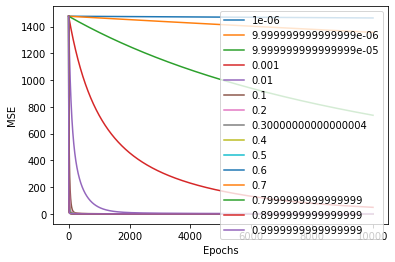

best value of learning rate is: 0.9999999999999999
[-4.024837413070742, -4.212470139162185, -4.21544468064208, -4.222471375888262, -4.2284409833553624, -4.235262957215222, -4.247024649837835, -4.29751885923389, -4.317313079250196, -4.353014198676769, -4.353403306303201, -4.364853887043815, -4.381103997908344, -4.41686954824149, -4.419329684182238, -4.435259938496862, -4.448182912131154, -4.513092162559946, -4.608394200822224, -4.624475422946643, -4.632306545615697, -4.640277069731691, -4.685106815854059, -4.70856926782361, -4.732867633781587, -4.778928903561989, -4.879333796248346, -4.905273638290765, -4.924716166377284, -4.936525350152133, -4.965088409748892, -4.997308470855042, -5.050993662457499, -5.053423489721196, -5.074838724952026, -5.083029412432989, -5.115690166265193, -5.2523397891205, -5.258621195131131, -5.262868776711864, -5.281335267524345, -5.3038639248276365, -5.352057882122794, -5.396546819180396, -5.470166014669043, -5.4971236201042775, -5.498681498366979, -5.52370448

In [6]:
# 1.3.2.3
# try with different learning rates and choose the best one
# 1.3.2.3
# try with different learning rates and choose the best one
# 1.3.2.3
# try with different learning rates and choose the best one
import matplotlib.pyplot as plt


epochval=10000

score=[]
epochList=[]
val=float("inf")
ind=1
l=0.000001
while l<=1:
    w,e,c=gradient_descent(x_train,y_train,l,epochval)
    epochlist=e
    if val>c[epochval-1]:
      val=c[epochval-1]
      ind=l

    score.append(c)
    if l<0.1:
      l=l*10
    else:
      l=l+0.1
plt.xlabel('Epochs')
plt.ylabel('MSE')
l=0.000001
i=0

while l<=1:
    plt.plot(epochlist,score[i],label=l)
    i=i+1
    if l<0.1:
      l=l*10
    else:
      l=l+0.1
plt.legend()
plt.show()
print("best value of learning rate is:",ind)
y_pred=linearRegression(x_train,y_train,x_test,learningRate=0.13)
print(y_pred)
print(y_test)

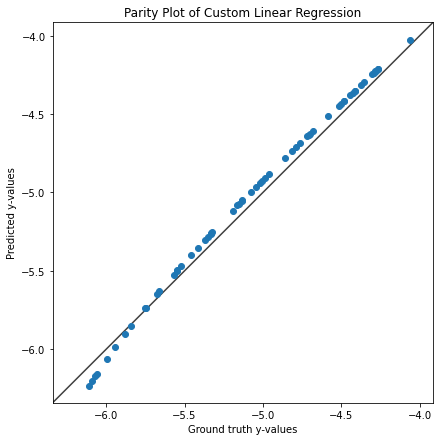

In [7]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Ridge regression is L2 regularization  technique on linear regression.if data suffers to multicollinearity , then it will be used . 

In [8]:
# 1.3.2.2
# you should not have imported sklearn before this point
# 1.3.2.2
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
rms=[]
a=1e-15
l=[]
while a<=32:
    l.append(a)
    model=Ridge(alpha=a)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=mean_squared_error(y_test, y_pred, squared=False)
    if(a<1):
      a=a*10
    else:
      a=a*2
    rms.append(error)
df=pd.DataFrame(list(zip(l,rms)),columns=['alpha','RMSE'])
df

alpha      RMSE
0   1.000000e-15  0.000026
1   1.000000e-14  0.000009
2   1.000000e-13  0.005275
3   1.000000e-12  0.000109
4   1.000000e-11  0.001396
5   1.000000e-10  0.001895
6   1.000000e-09  0.005762
7   1.000000e-08  0.009787
8   1.000000e-07  0.020284
9   1.000000e-06  0.043229
10  1.000000e-05  0.050875
11  1.000000e-04  0.146143
12  1.000000e-03  0.074061
13  1.000000e-02  0.307387
14  1.000000e-01  0.109349
15  1.000000e+00  0.070871
16  2.000000e+00  0.108786
17  4.000000e+00  0.267729
18  8.000000e+00  0.636372
19  1.600000e+01  1.218342

<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

1.  alpha valuedenotes the penalize value that resultss the model more underfit.
2. alpha value can be any value in range 0 to infinite.
3. ridge regression with less alpha value is similar likenormal regression.
4. as beacause ooverfitting lower alpha value gives better result in this dataset
5. in general rmse increase with alpha value.
 

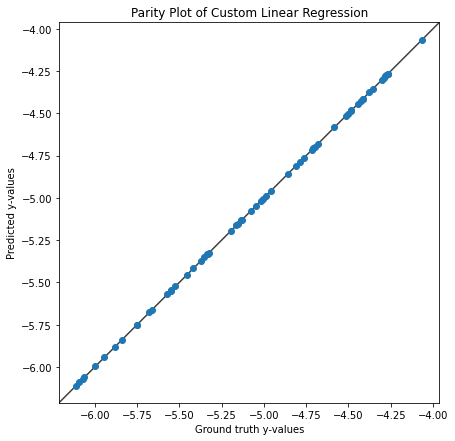

In [9]:
# 1.3.2.4
# 1.3.1.4
# Get the predictions of x_test into `y_pred`
m=Ridge(alpha=1e-14)
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`


LASSO regression is basically L1 regularization technique on linear regression.this adds some penalty whaich is equal to absolute value of coefficient.
some coefficient may be zero.
If penalties value larger, then coefficient values will be closer to zero, this is the ideal for producing simpler models.

In [10]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

from sklearn.linear_model import Lasso
rms=[]
a=1e-15
l=[]
while a<=32:
    l.append(a)
    model=Lasso(alpha=a)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=mean_squared_error(y_test, y_pred, squared=False)
    if(a<1):
      a=a*10
    else:
      a=a*2
    rms.append(error)
df=pd.DataFrame(list(zip(l,rms)),columns=['alpha','RMSE'])
df


alpha      RMSE
0   1.000000e-15  0.313786
1   1.000000e-14  0.313786
2   1.000000e-13  0.313786
3   1.000000e-12  0.313786
4   1.000000e-11  0.313786
5   1.000000e-10  0.313783
6   1.000000e-09  0.313755
7   1.000000e-08  0.313481
8   1.000000e-07  0.311178
9   1.000000e-06  0.329377
10  1.000000e-05  0.441895
11  1.000000e-04  0.612490
12  1.000000e-03  0.179667
13  1.000000e-02  0.042420
14  1.000000e-01  0.414369
15  1.000000e+00  4.269928
16  2.000000e+00  4.996771
17  4.000000e+00  4.996771
18  8.000000e+00  4.996771
19  1.600000e+01  4.996771

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

1. for measure error we use this term root mean square error term . and for making this model genric in nature we use alpha value. alpha value penalize the model.
2. alpha can be any value in(0,infinity).
3. higher alpha value denotes generic model and lesser alpha value be similar to linear regression. 
4. Because of overfittinig in our dataset, we can see that model with lower alpha value is more accurate.
5. in this lasso Regression,  values of alpha increases with RMSE increases

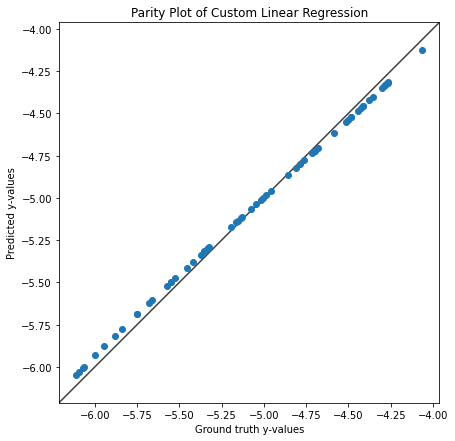

In [11]:
# 1.3.3.4

m=Lasso(alpha=1e-2)
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()